## <center> **Segmentation des Clients**
### <center> **Réalisé par Elauïne BERNARD**
### <center> **Economètre-Statisticienne / Data Scientist**

### **Contexte**
Une entreprise de commerce en ligne souhaite mieux comprendre ses clients afin d'améliorer ses stratégies marketing. Actuellement, les clients sont variés en termes d'âge, de comportements d'achat, de durée d'utilisation de la plateforme, et de satisfaction. Cependant, aucune segmentation claire n'a été réalisée pour personnaliser les offres ou les campagnes publicitaires.

### **Objectif**
Segmenter nos clients en groupes distincts afin de mieux personnaliser nos offres et optimiser nos campagnes marketing.

### **Plan**
1. Importation et Traitement des données
2. Analyse Exploratoire des données
3. Feature Engineering
4. Clustering

##### Importation des Packages

In [153]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.vq import kmeans, vq

#### **1- Importation et Traitement des données**

##### Importation des données

In [5]:
# Définition répertoire de travail
repertoire=r"C:\Users\berna\Documents\Portfolio\data"
os.chdir(repertoire)

In [63]:
# Importation de la dataset
Base=pd.read_csv("E_commerce_data.csv")
Base.head()

,Client_ID,Age,Sexe,Revenu_Annuel,Fréquence_Achat,Montant_Total_Dépensé,Type_Produit_Principal,Durée_Client,Visites_Mensuelles,Panier_Moyen,Reduction_Utilisee,Satisfaction_Client
0,1,56,Homme,102421.0,23,9260.71,Alimentation,7,19,433.19,Non,6.0
1,2,69,Femme,112244.0,21,2408.75,Vêtements,12,2,222.39,Non,4.0
2,3,46,Femme,85584.0,21,13491.06,Sport,6,12,182.76,Non,3.0
3,4,32,Homme,39950.0,11,8705.70,Maison,13,12,309.69,Oui,1.0
4,5,60,Homme,35173.0,7,16353.67,Electronique,11,8,125.31,Non,6.0


##### Présentation de la base de données

In [9]:
Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Client_ID               5050 non-null   int64  
 1   Age                     5050 non-null   int64  
 2   Sexe                    5050 non-null   object 
 3   Revenu_Annuel           4947 non-null   float64
 4   Fréquence_Achat         5050 non-null   int64  
 5   Montant_Total_Dépensé   5050 non-null   float64
 6   Type_Produit_Principal  5050 non-null   object 
 7   Durée_Client            5050 non-null   int64  
 8   Visites_Mensuelles      5050 non-null   int64  
 9   Panier_Moyen            5050 non-null   float64
 10  Reduction_Utilisee      5050 non-null   object 
 11  Satisfaction_Client     4950 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 473.6+ KB


La base contient 5050 observations et 11 variables:
- Client_ID : Identifiant unique pour chaque client.
- Age : Âge du client.
- Sexe : Sexe du client.
- Revenu_Annuel : Revenu annuel estimé du client en dollars.
- Fréquence_Achat : Nombre d'achats effectués au cours des 12 derniers mois.
- Montant_Total_Dépensé : Montant total dépensé par le client sur la plateforme au cours des 12 derniers mois (en dollars).
- Type_Produit_Principal : Catégorie principale des produits achetés (électronique, vêtements, alimentation, etc.).
- Durée_Client : Nombre d'années depuis que le client est inscrit sur la plateforme.
- Visites_Mensuelles : Nombre moyen de visites par mois.
- Panier_Moyen : Valeur moyenne des paniers par visite.
- Réduction_Utilisée : Indique si le client utilise souvent des coupons de réduction (Oui/Non).
- Satisfaction_Client : Note de satisfaction du client sur une échelle de 1 à 10.
  
Toutes les variables sont définis dans le bon type

In [65]:
# Gestion de valeurs manquantes

# Afficher les valeurs manquantes
valeurs_manquantes=Base.isna().sum()
valeurs_manquantes=valeurs_manquantes[valeurs_manquantes>0]
print("Avant, il y  avait ",len(valeurs_manquantes), "colonnes avec des valeurs manquantes :")
print(valeurs_manquantes)

#Imputation du revenu annel moyen aux valeurs manquantes pour la variable  Revenu_Annuel
Base['Revenu_Annuel']=Base['Revenu_Annuel'].fillna(Base['Revenu_Annuel'].mean())

# Supression des lignes ayant des valeurs manquantes pour la variable Satisfaction_Client
Base.dropna(subset=['Satisfaction_Client'],inplace=True)

# Vérification finale
valeurs_manquantes=Base.isna().sum()
valeurs_manquantes=valeurs_manquantes[valeurs_manquantes>0]
print("Maintenant, il y a ",len(valeurs_manquantes), "colonne avec des valeurs manquantes. Et la base contient:",len(Base),"observations maintenant.")

Avant, il y  avait  2 colonnes avec des valeurs manquantes :
Revenu_Annuel          103
Satisfaction_Client    100
dtype: int64
Maintenant, il y a  0 colonne avec des valeurs manquantes. Et la base contient: 4950 observations


In [67]:
# Gestion de doublons

# Vérification des lignes dupliquées
doublons=Base.duplicated().sum()
print("Avant, il y avait ", doublons, "ligne(s) dupliquées")
# Suppression de ligne dupliquées
Base.drop_duplicates(inplace=True)
doublons=Base.duplicated().sum()
print("Maintenant, il y a ", doublons, "ligne dupliquée")
# Vérification de duplication pour la colonne Client_ID
doublons_ID=Base.duplicated(['Client_ID']).sum()
print('Avant, il y avait',doublons_ID, 'doublons au niveau des identifiants des clients')
# Supressions des doublons pour la colonne Client_ID
Base.drop_duplicates(['Client_ID'],inplace=True)
doublons_ID=Base.duplicated(['Client_ID']).sum()
print('Maintenant, il y a',doublons_ID, 'doublon au niveau des identifiants des clients')
print('la base contient maintenant',len(Base), 'observations')

Avant, il y avait  48 ligne(s) dupliquées
Maintenant, il y a  0 ligne dupliquée
Avant, il y avait 47 doublons au niveau des identifiants des clients
Maintenant, il y a 0 doublon au niveau des identifiants des clients
la base contient maintenant 4855 observations


In [69]:
# suppression de colonne non pertinente
# Nous n'avons pas besoin de la colonne Client_ID, elle n'est pas pertinente pour notre analyse. Nous allons donc l'enlever de la base
Base.drop(columns="Client_ID",inplace=True)
print(Base.columns)

Index(['Age', 'Sexe', 'Revenu_Annuel', 'Fréquence_Achat',
       'Montant_Total_Dépensé', 'Type_Produit_Principal', 'Durée_Client',
       'Visites_Mensuelles', 'Panier_Moyen', 'Reduction_Utilisee',
       'Satisfaction_Client'],
      dtype='object')


#### **2- Analyse Exploratoire des données**

##### Description des variables numériques

In [37]:
Base.describe()

,Age,Revenu_Annuel,Fréquence_Achat,Montant_Total_Dépensé,Durée_Client,Visites_Mensuelles,Panier_Moyen,Satisfaction_Client
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.600000,85281.368800,15.122600,10042.801048,7.629000,10.036600,259.307100,5.547600
std,14.885789,37788.681861,8.229892,5790.841244,3.973678,5.427481,138.463748,2.861079
min,18.000000,20002.000000,1.000000,103.140000,1.000000,1.000000,20.000000,1.000000
25%,31.000000,52470.750000,8.000000,4971.722500,4.000000,5.000000,137.400000,3.000000
50%,43.000000,85567.500000,15.000000,10013.085000,8.000000,10.000000,260.315000,6.000000
75%,57.000000,118042.750000,22.000000,15174.122500,11.000000,15.000000,376.302500,8.000000
max,69.000000,149994.000000,29.000000,19998.500000,14.000000,19.000000,499.900000,10.000000


- Âge : L'age moyen des clients est de 43,6 ans, l'age minimum etant 18 et le maximum 69.
- Revenu Annuel : Le revenu annuel moyen est de 85 281,37, avec des valeurs s'étendant de 20 002 à 149 994.
- Fréquence Achat : La fréquence moyenne d'achat est de 15 achats par client, avec une majorité des clients faisant entre 8 et 22 achats.
- Montant Total Dépensé : En moyenne, chaque client a dépensé 10 042,80, avec un écart important allant de 103 à 19 998.
- Durée Client : La durée moyenne de fidélité des clients est de 7,63 ans, avec un minimum d'un an et un maximum de 14 ans.
- Visites Mensuelles : Les clients effectuent en moyenne 10 visites mensuelles, avec une majorité visitant entre 5 et 15 fois.
- Panier Moyen : Le montant moyen par panier est de 259,31, avec une dispersion notable allant de 20 à 499.
- Satisfaction Client : La satisfaction moyenne est de 5,55 sur 10, avec des clients ayant une satisfaction variant entre 1 et 10.

##### Description des variables catégorielles

In [87]:
# Extraction des variables catégorielles de la base 
categorical_columns = Base.select_dtypes(include=['object', 'category']).columns.tolist()
# Création de tableau de fréquence pour les variables catégorielles
for col in categorical_columns:
    print(Base[col].value_counts())
    print(" ")

Sexe
Femme    2438
Homme    2397
Homne      20
Name: count, dtype: int64
 
Type_Produit_Principal
Sport           857
Vêtements       817
Maison          795
Beauté          795
Alimentation    792
Electronique    780
Electro          19
Name: count, dtype: int64
 
Reduction_Utilisee
Non    2493
Oui    2362
Name: count, dtype: int64
 


Nous remarquons qu'i y a des erreurs de saisie dans les modalités de la variable Sexe et de la variable Type_Produit_Principal.
Nous allons corriger cela.

In [93]:
# Correction pour la variable Sexe
Base['Sexe'] = Base['Sexe'].replace({'Homne': 'Homme'})

# Correction pour la variable Sexe
Base['Type_Produit_Principal'] = Base['Type_Produit_Principal'].replace({'Electro': 'Electronique'})

# Vérification
print(Base['Sexe'].value_counts())
print(" ")
print(Base['Type_Produit_Principal'].value_counts())

Sexe
Femme    2438
Homme    2417
Name: count, dtype: int64
 
Type_Produit_Principal
Sport           857
Vêtements       817
Electronique    799
Maison          795
Beauté          795
Alimentation    792
Name: count, dtype: int64


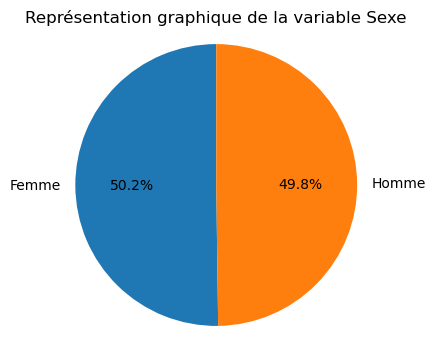

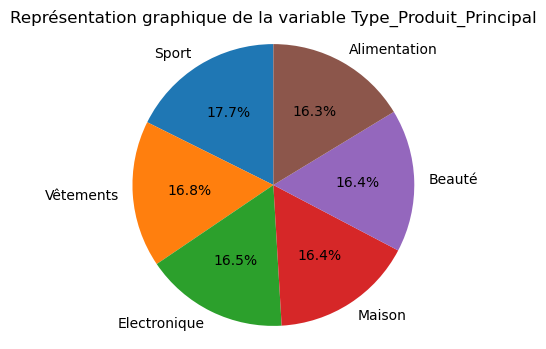

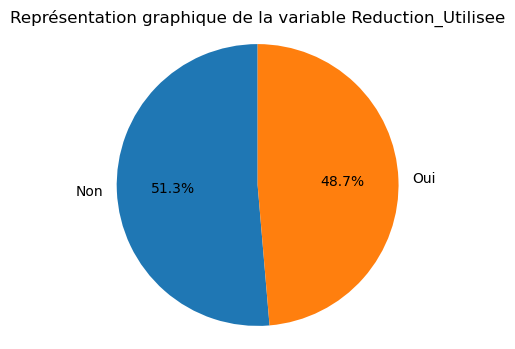

In [95]:
# Parcourir la liste des variables catégorielles et créer un camembert pour chacune d'elles
for col in categorical_columns:
    # Compter les occurrences de chaque catégorie
    counts = Base[col].value_counts()
    
    # Créer un camembert (pie chart)
    plt.figure(figsize=(4, 4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Représentation graphique de la variable {col}")
    plt.axis('equal')  
    plt.show()

- 50.2% des clients sont des femmes et 49.8% sont des hommes.
- Les catégories Sport (17,7%) et Vêtements (16,8%) sont légèrement plus populaires que les autres types de produits.Les catégories Alimentation, Beauté, Maison, et Électronique représentent chacune environ 16% des achats.La répartition des types de produits est globalement bien équilibrée, sans qu'aucune catégorie ne domine clairement.
- 51.3% des clients utilise souvent des coupons de réduction dans le magasin.

#### **3- Feature Engineering**

In [157]:
# Identification automatique des colonnes numériques et catégorielles
numeric_features = Base.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = Base.select_dtypes(include=['object', 'category']).columns.tolist()

# Création du pipeline de transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standardisation des variables numériques
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # Encodage One-Hot pour les variables catégorielles
    ])

# Appliquer les transformations aux données
Base_transformed = preprocessor.fit_transform(Base)

# Obtenir les noms des colonnes numériques et encodées
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(encoded_columns)

# Convertir l'array NumPy en DataFrame avec les bonnes colonnes
Base_transformed_df = pd.DataFrame(Base_transformed, columns=all_columns)


#### **4-Clustering**

##### Choix du nombre de cluster avec Elbow Method

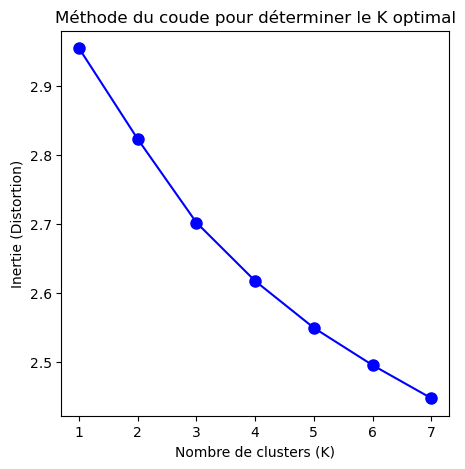

In [159]:
inertias = []

# Appliquer K-means pour différentes valeurs de K 
K_range = range(1, 8)
for K in K_range:
    # Appliquer K-means avec K clusters
    centroids, distortion = kmeans(Base_transformed, K)
    # Calculer l'inertie 
    inertias.append(distortion)

# Tracer la méthode du coude
plt.figure(figsize=(5, 5))
plt.plot(K_range, inertias, 'bo-', markersize=8)
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie (Distortion)')
plt.title('Méthode du coude pour déterminer le K optimal')
plt.show()

En considérant le graphique nous chosisons k=3

##### Création des clusters avec kmeans (k=3)

In [162]:
# Appliquer K-means avec K=3 en utilisant SciPy
centroids, distortion = kmeans(Base_transformed, 3)

# Assigner chaque point de données à son cluster
cluster_labels, _ = vq(Base_transformed, centroids)

# Ajouter les clusters au DataFrame original
Base_transformed_df['Cluster'] = cluster_labels
Base_transformed_df.head()

,Age,Revenu_Annuel,Fréquence_Achat,Montant_Total_Dépensé,Durée_Client,Visites_Mensuelles,Panier_Moyen,Satisfaction_Client,Sexe_Homme,Type_Produit_Principal_Beauté,Type_Produit_Principal_Electronique,Type_Produit_Principal_Maison,Type_Produit_Principal_Sport,Type_Produit_Principal_Vêtements,Reduction_Utilisee_Oui,Cluster
0,0.826844,0.463707,0.946697,-0.267345,-0.136753,1.644047,1.278750,0.169709,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.698432,0.726340,0.704377,-0.492757,1.109369,-1.501764,-0.249632,-0.530026,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.156393,0.013546,0.704377,-0.128178,-0.385977,0.348713,-0.536965,-0.879893,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-0.782240,-1.206545,-0.507226,-0.285604,1.358594,0.348713,0.383327,-1.579629,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4,1.095025,-1.334265,-0.991867,-0.034005,0.860145,-0.391478,-0.953499,0.169709,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0


##### Interprétation des résultats 

In [168]:
# Calculer les moyennes des variables  par cluster
summary = Base_transformed_df.groupby('Cluster').mean()
print("Moyennes des variables  par cluster :")
print(summary)

Moyennes des variables  par cluster :
              Age  Revenu_Annuel  Fréquence_Achat  Montant_Total_Dépensé  \
Cluster                                                                    
0        0.012030       0.090523         0.002411              -0.220072   
1        0.008416       0.091274         0.017003              -0.223052   
2       -0.178071      -1.580675        -0.167610               3.852749   

         Durée_Client  Visites_Mensuelles  Panier_Moyen  Satisfaction_Client  \
Cluster                                                                        
0            0.002004            0.007928      0.008528             0.868840   
1           -0.006880           -0.007711     -0.005663            -0.874355   
2            0.041669           -0.003158     -0.026070            -0.094017   

         Sexe_Homme  Type_Produit_Principal_Beauté  \
Cluster                                              
0          0.505826                       0.165732   
1          0.49208

- Cluster 0 : Des clients ayant des revenus moyens, dépensant modérément, et très satisfaits. Ils achètent davantage de produits électroniques et de   sport, et utilisent des réductions fréquemment.
- Cluster 1 : Des clients avec des revenus moyens, mais peu satisfaits et utilisant moins de réductions. Ils achètent davantage de produits de maison et dépensent modérément.
- Cluster 2 : Clients à faible revenu, mais avec des dépenses très élevées, un intérêt marqué pour les produits de maison et de vêtements, et une utilisation régulière des réductions.

**Implications pour la Segmentation**
- Cluster 0 pourrait être ciblé avec des programmes de fidélisation pour renforcer encore leur satisfaction.
- Cluster 1 nécessite une attention particulière pour comprendre les sources d'insatisfaction et potentiellement améliorer leur expérience.
- Cluster 2 pourrait bénéficier d'offres spéciales ou de réductions pour optimiser leurs dépenses malgré un revenu limité.